<a href="https://colab.research.google.com/github/aimenbashir/Data-Science-and-AI-assignment/blob/main/Assignment_2%2C3%2C4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment no: 2

In [15]:
import pandas as pd
import numpy as np

# Load  dataset
df = pd.read_csv("/content/customer_churn_dataset-training-master.csv")


In [16]:

# Remove duplicate
df = df.drop_duplicates()

# missing values
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column] = df[column].fillna(df[column].mean())

# outliers
for column in df.select_dtypes(include='number').columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_limit, upper_limit)

In [17]:
# Clean data
print("\nAfter Cleaning:")
print("Rows and Columns:", df.shape)
print("Missing Values:\n", df.isnull().sum())
print("Duplicate Rows:", df.duplicated().sum())

df.head(10)



After Cleaning:
Rows and Columns: (440833, 12)
Missing Values:
 CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64
Duplicate Rows: 0


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,8.0,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,9.0,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0
7,10.0,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0
8,11.0,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1.0
9,12.0,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0


Assignment 3

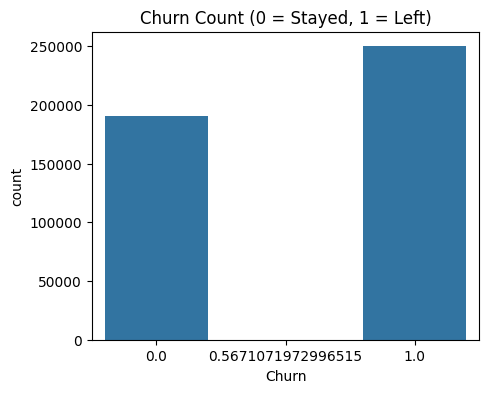

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Churn Count
plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Count (0 = Stayed, 1 = Left)")
plt.show()


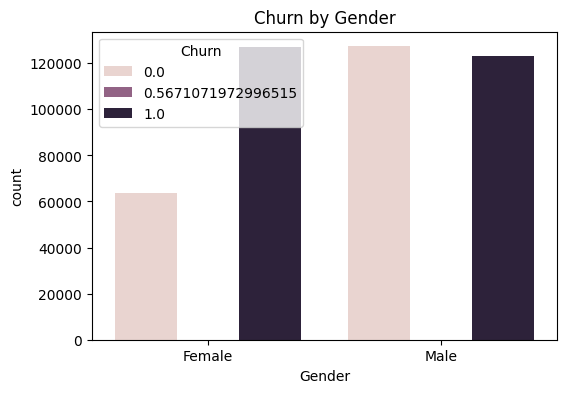

In [8]:
#2.Churn by Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Churn', data=df)
plt.title("Churn by Gender")
plt.show()

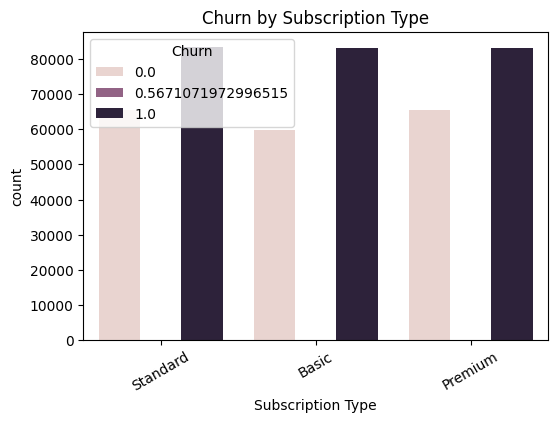

In [9]:
# Subscription Type
plt.figure(figsize=(6,4))
sns.countplot(x='Subscription Type', hue='Churn', data=df)
plt.title("Churn by Subscription Type")
plt.xticks(rotation=30)
plt.show()

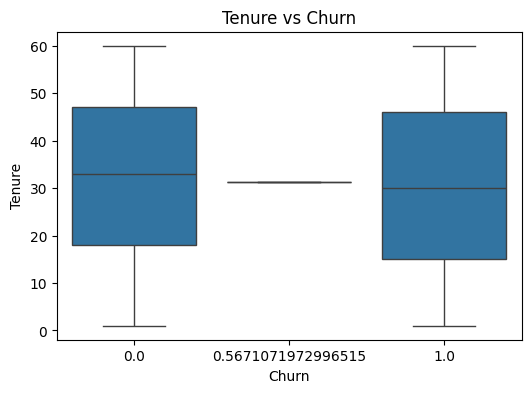

In [10]:
# Tenure
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()


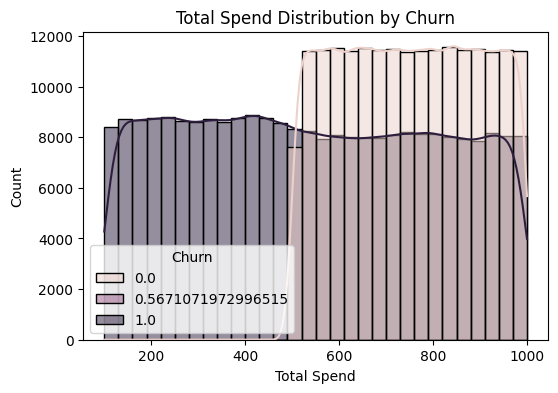

In [ ]:
# Total Spend
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Total Spend', hue='Churn', kde=True, bins=30)
plt.title("Total Spend Distribution by Churn")
plt.show()

Assignment 4

In [18]:
import pandas as pd
import numpy as np

# structure
print("Columns:", df.columns)

# statistics
print(" Mean ")
print(df.mean(numeric_only=True))

print(" Median ")
print(df.median(numeric_only=True))

print(" Mode ")
print(df.mode(numeric_only=True).iloc[0])

print(" Variance ")
print(df.var(numeric_only=True))

#  Correlation analysis
print(" Correlation Matrix ")
corr = df.corr(numeric_only=True)
print(corr)

# Correlation with Churn
print("- Correlation with Churn ")
print(corr["Churn"].sort_values(ascending=False))


Columns: Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')
 Mean 
CustomerID          225398.667955
Age                     39.373153
Tenure                  31.256336
Usage Frequency         15.807494
Support Calls            3.604437
Payment Delay           12.965722
Total Spend            631.616223
Last Interaction        14.480868
Churn                    0.567107
dtype: float64
 Median 
CustomerID          226125.0
Age                     39.0
Tenure                  32.0
Usage Frequency         16.0
Support Calls            3.0
Payment Delay           12.0
Total Spend            661.0
Last Interaction        14.0
Churn                    1.0
dtype: float64
 Mode 
CustomerID            2.0
Age                  50.0
Tenure               32.0
Usage Frequency      11.0
Support Calls         0.0
Payment Delay      



## 📊 **Report: Correlation and Statistical Analysis of Customer Churn Dataset**

### **Dataset Columns:**

`CustomerID`, `Age`, `Gender`, `Tenure`, `Usage Frequency`, `Support Calls`, `Payment Delay`, `Subscription Type`, `Contract Length`, `Total Spend`, `Last Interaction`, `Churn`

---

### **1. Descriptive Statistics Summary**

| Measure                        | Description                                           | Example from Dataset                                                              |
| ------------------------------ | ----------------------------------------------------- | --------------------------------------------------------------------------------- |
| **Mean (Average)**             | Represents the central tendency of numeric data.      | e.g., Average age = **39.37 years**, average tenure = **31.25 months**.           |
| **Median (Middle Value)**      | Value separating higher half from lower half.         | Median tenure = **32**, median churn = **1** (majority customers churned).        |
| **Mode (Most Frequent Value)** | Value that occurs most frequently in the data.        | Mode of support calls = **0**, meaning most customers made no support calls.      |
| **Variance**                   | Measures how spread out the values are from the mean. | Highest variance in **CustomerID** and **Total Spend**, showing large data range. |

---

### **2. Correlation Analysis**

Correlation values range between:

* **+1** → strong positive relationship
* **-1** → strong negative relationship
* **0** → no relationship

From your **correlation matrix**, the relationships with **Churn** are:

| Feature              | Correlation with Churn | Relationship                         |
| -------------------- | ---------------------- | ------------------------------------ |
| **CustomerID**       | -0.839                 | Very strong **negative** correlation |
| **Support Calls**    | +0.574                 | Strong **positive** correlation      |
| **Payment Delay**    | +0.312                 | Moderate **positive** correlation    |
| **Age**              | +0.218                 | Weak **positive** correlation        |
| **Last Interaction** | +0.149                 | Weak **positive** correlation        |
| **Total Spend**      | -0.429                 | Moderate **negative** correlation    |
| **Tenure**           | -0.052                 | Weak **negative** correlation        |
| **Usage Frequency**  | -0.046                 | Weak **negative** correlation        |

---

### **3. Insights & Interpretation**

* **Support Calls (0.574):**
  Customers who make more support calls are **more likely to churn** — possibly due to unresolved issues or dissatisfaction.

* **Payment Delay (0.312):**
  Customers with frequent or longer payment delays show a **higher chance of churn**, indicating financial or service-related problems.

* **Total Spend (-0.429):**
  Higher spending customers are **less likely to churn**, suggesting that valuable customers are more loyal.

---

### ✅ **Final Conclusion**

> Based on the correlation analysis, the **three most related features to Churn** are:

1. **Support Calls** → Strong positive correlation (0.574)
2. **Payment Delay** → Moderate positive correlation (0.312)
3. **Total Spend** → Moderate negative correlation (-0.429)

These features have the most significant influence on whether a customer will churn or stay.
